## **Base Algorithm**

In [1]:
import string
from english_dictionary.scripts.read_pickle import get_dict
dictionary = get_dict()

sentence = "this is a sentence"

print("\033[1m----------ITERATION 0----------\033[0m")
print(sentence)

# iterate process
for n in range(3):

    # isolate each word
    words = sentence.translate(str.maketrans("", "", string.punctuation)).split()
    new_sentence = ""

    # loop over each word and replace with definition
    for word in words:
        
        if word in dictionary:
            new_sentence += dictionary[word] + " "
        else:
            new_sentence += word + " "
    
    # clean sentence
    sentence = new_sentence.replace(":", "").strip()
    print(f"\n\033[1m----------ITERATION {n+1}----------\033[0m")
    print(sentence)

----------ITERATION 0----------
this is a sentence

----------ITERATION 1----------
the person, thing, or idea that is present or near in place, time, or thought or that has just been mentioned island; isle  the 1st letter of the English alphabet  a word, clause, or phrase or a group of clauses or phrases forming a syntactic unit which expresses an assertion, a question, a command, a wish, an exclamation, or the performance of an action, that in writing usually begins with a capital letter and concludes with appropriate end punctuation, and that in speaking is distinguished by characteristic patterns of stress, pitch, and pauses

----------ITERATION 2----------
than before  than otherwise  human, individual  an object or entity not precisely designated or capable of being designated  either  a formulated thought or opinion  the person, thing, or idea indicated, mentioned, or understood from the situation island; isle  something presented  gift  either near  into sense 1  physical envir

## **Algorithm with Analysis**

In [2]:
import random

iterations = 5
sentence_count = 5

sentences = []
growths = []
final_sentences = []

# generate a random setence
for n in range(sentence_count):   
    words = list(dictionary.keys())
    sentence_length = random.randint(10, 20)
    random_words = random.choices(words, k=sentence_length)
    sentences.append(" ".join(random_words))

for sentence in sentences:
    
    for _ in range(iterations):
    
        words = sentence.translate(str.maketrans("", "", string.punctuation)).split()
        growths.append(len(words))
        new_sentence = ""
    
        for word in words:
            
            if word in dictionary:
                new_sentence += dictionary[word] + " "
            else:
                new_sentence += word + " "
    
        sentence = new_sentence.replace(":", "").strip()
        
    growths.append(len(sentence))
    final_sentences.append(sentence)

### **Growth Investigation**

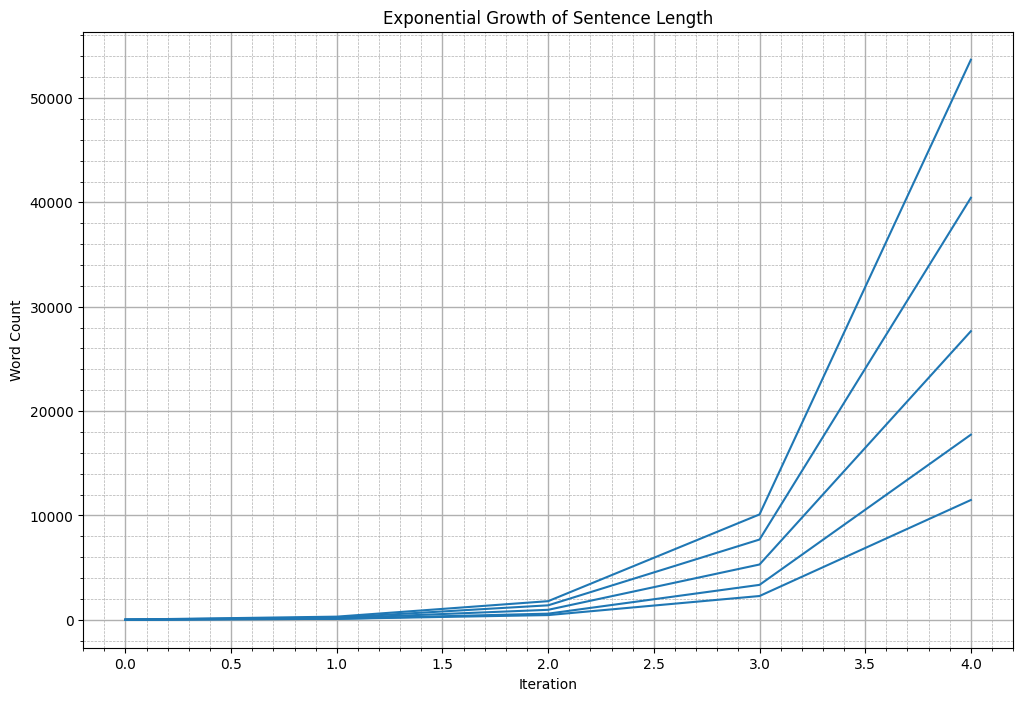

In [3]:
import matplotlib.pyplot as plt

x_vals = list(range(iterations))

plt.figure(figsize=(12, 8))
plt.grid(True, which="major", linestyle="-", linewidth=1.0)
plt.grid(True, which="minor", linestyle="--", linewidth=0.5)
plt.minorticks_on()

for i in range(0, len(growths), iterations+1):
    y_segment = growths[i:i + iterations]
    plt.plot(x_vals, y_segment, color="#1f77b4")

plt.title("Exponential Growth of Sentence Length")
plt.ylabel("Word Count")
plt.xlabel("Iteration")
plt.show()

### **Word Frequency**

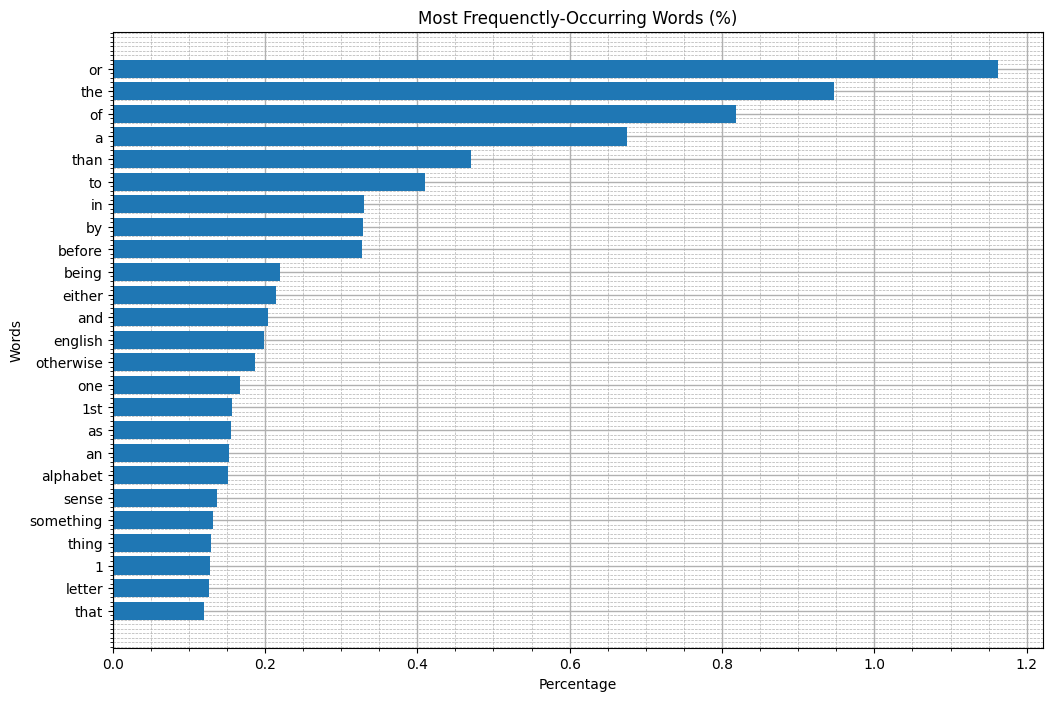

In [4]:
import re
from collections import Counter

# combine all sentences
super_sentence = " "
for sentence in final_sentences:
    super_sentence += sentence + " "

# find most frequenctly-occurring words
words = re.findall(r"\b\w+\b", super_sentence.lower())
word_counts = Counter(words)
most_frequent = word_counts.most_common(25)
words, counts = zip(*most_frequent)

# convert to percentages
length = len(super_sentence)
count_percent = [count / length * 100 for count in counts]

plt.figure(figsize=(12, 8))
plt.grid(True, which="major", linestyle="-", linewidth=1.0)
plt.grid(True, which="minor", linestyle="--", linewidth=0.5)
plt.minorticks_on()
plt.barh(words, count_percent, zorder=2)
plt.title("Most Frequenctly-Occurring Words (%)")
plt.ylabel("Words")
plt.xlabel("Percentage")
plt.gca().invert_yaxis()
plt.show()